# Análise de Previsão de Notas de Alunos

### 1. Entendimento do Negócio

[Base de dados do Kaggle]('https://www.kaggle.com/datasets/haseebindata/student-performance-predictions/data')

O **Conjunto de Dados de Desempenho Estudantil** foi criado para avaliar e prever os resultados dos alunos com base em diversos fatores que podem influenciar o sucesso acadêmico. Esse conjunto de dados sintético inclui características que são comumente consideradas em pesquisas educacionais e cenários do mundo real, como frequência, hábitos de estudo, desempenho acadêmico anterior e participação em atividades extracurriculares. O objetivo é entender como esses fatores se correlacionam com as notas finais dos alunos e construir um modelo preditivo que possa prever o desempenho dos estudantes.

**Características do Conjunto de Dados:**
- **StudentID**: Um identificador único para cada aluno.
- **Nome**: O nome do aluno.
- **Gênero**: O gênero do aluno (Masculino/Feminino).
- **Taxa de Frequência**: A porcentagem de aulas frequentadas pelo aluno.
- **Horas de Estudo por Semana**: O número de horas que o aluno passa estudando a cada semana.
- **Nota Anterior**: A nota que o aluno alcançou no semestre anterior (de 0 a 100).
- **Atividades Extracurriculares**: O número de atividades extracurriculares em que o aluno está envolvido.
- **Apoio dos Pais**: Uma avaliação qualitativa do nível de apoio fornecido pelos pais do aluno (Alto/Médio/Baixo).
- **Nota Final**: A nota final do aluno (de 0 a 100), que serve como a variável-alvo para a previsão.

**Casos de Uso:**
- **Previsão de Desempenho Estudantil**: O conjunto de dados pode ser usado para construir modelos de aprendizado de máquina que preveem a nota final dos alunos com base nas outras características. Isso pode ajudar educadores a identificar alunos que podem precisar de apoio adicional para melhorar seus resultados.

- **Análise Exploratória de Dados**: Pesquisadores e cientistas de dados podem explorar as relações entre diferentes fatores (como frequência ou hábitos de estudo) e o desempenho dos alunos. Por exemplo, entender se uma frequência maior se correlaciona com notas melhores.

- **Análise de Importância de Características**: O conjunto de dados permite o exame de quais características são mais preditivas para o sucesso estudantil, fornecendo insights sobre áreas-chave de foco para intervenções educacionais.

- **Intervenções Educacionais**: Ao identificar padrões nos dados, escolas e instituições educacionais podem implementar intervenções direcionadas para ajudar os alunos a melhorar em áreas específicas, como aumentar as horas de estudo ou incentivar a participação em atividades extracurriculares.

**Possíveis Insights:**
- **Correlação entre Hábitos de Estudo e Desempenho**: O conjunto de dados pode ser usado para determinar quanto o tempo de estudo contribui para o sucesso acadêmico.

- **Impacto da Frequência nas Notas**: A análise pode revelar até que ponto a frequência regular influencia as notas finais.

- **Papel das Atividades Extracurriculares**: O conjunto de dados pode ajudar a avaliar se a participação em atividades extracurriculares impacta positiva ou negativamente o desempenho acadêmico.

- **Influência do Apoio dos Pais**: Os dados permitem examinar como diferentes níveis de apoio parental afetam os resultados dos alunos.

### 2. Entendendo os Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BASE\REGRESSAO\student_performance.csv')

In [3]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [5]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [6]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

- Nesta etapa foi feita todo o entendimento dos dados.

    - colunas 'StudentID' e 'Name' serão excluídas, pois não tem relação com a predição que será feita;
    - as colunas 'Gender' e 'ParentalSupport' são variáveis _dummies_, precisam ser normalizadas

### Análise Exploratória

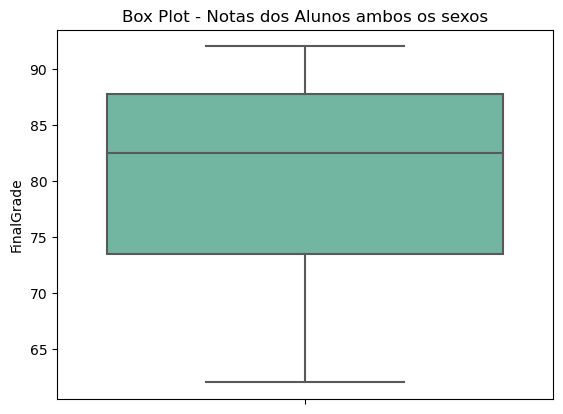

In [7]:
#Box Plot das notas dos alunos
sns.boxplot(data=df, y=df['FinalGrade'], palette='Set2')
plt.title('Box Plot - Notas dos Alunos ambos os sexos')
plt.grid(False)
plt.show()

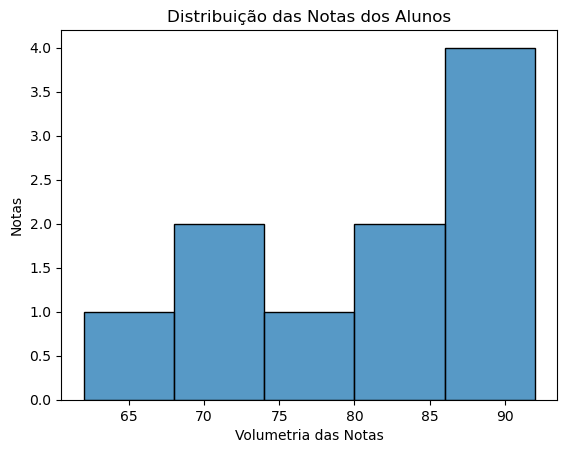

In [8]:
#Distribuição das notas dos alunos
sns.histplot(data=df, x=df['FinalGrade'])
plt.title("Distribuição das Notas dos Alunos")
plt.ylabel('Notas')
plt.xlabel('Volumetria das Notas')
plt.show()

In [9]:
#distribuição dos sexos
df['Gender'].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

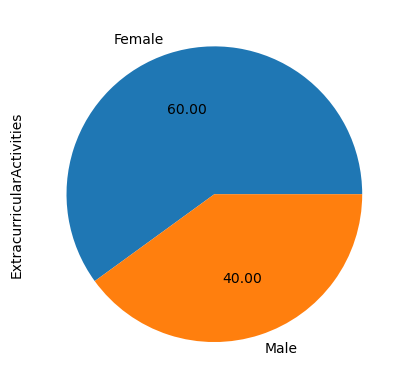

In [10]:
#total de horas extra curriculares por sexo
df.groupby('Gender')['ExtracurricularActivities'].sum().plot.pie(autopct='%.2f');

In [11]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

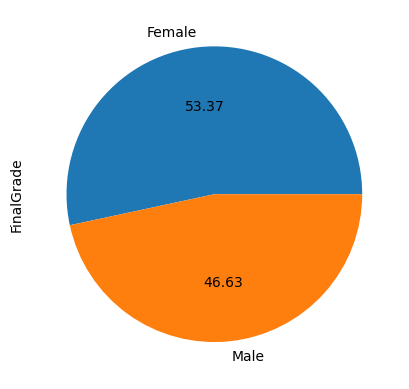

In [12]:
df.groupby('Gender')['FinalGrade'].mean().plot.pie(autopct='%.2f');

<Axes: xlabel='ParentalSupport'>

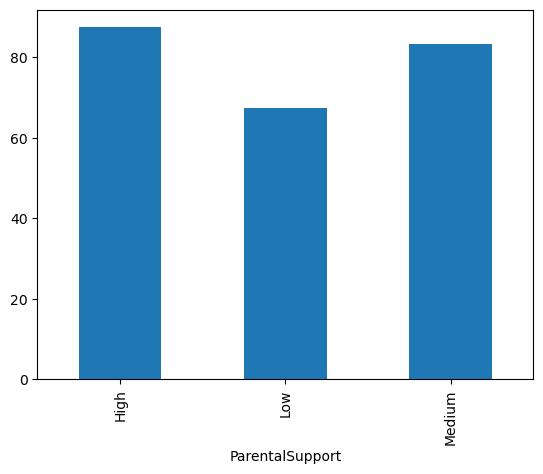

In [13]:
#média de nota com suporte parental
df.groupby('ParentalSupport')['FinalGrade'].mean().plot.bar()

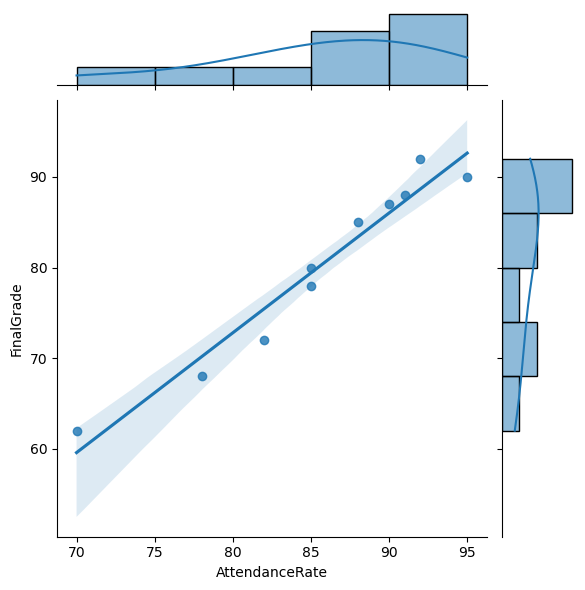

In [14]:
# Criação do gráfico correlação entre AttendenceRate x FinalGrade
sns.jointplot(data=df, x='AttendanceRate', y='FinalGrade', kind='reg')

- Nesta etapa foram analisados as correções dos dados:
    - Na base analisada não houve _outliers_ das notas dos alunas;
    - Podemos analisar a _distribuição das notas_ com ponto forte naentre 85 - 90;
    - 60% das _atividades extracurriculares_ são feitos pelo grupo feminino;
    - Podemos ver o impacto do suporte parental nas notas médias dos alunos.

### Normalizando os Dados

In [15]:
#male = 1
#female = 0
#df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [16]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [17]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [18]:
#nova tabela com dados para o modelo
#dados sem as colunas ['StudentID', 'Name',
df = df[['Gender', 'AttendanceRate', 'StudyHoursPerWeek','PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade']]
df.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,Male,85,15,78,1,High,80
1,Female,90,20,85,2,Medium,87
2,Male,78,10,65,0,Low,68
3,Male,92,25,90,3,High,92
4,Female,88,18,82,2,Medium,85


In [19]:
#normalizando
#drop_first=True - para evitar redundância
#sim=1
#não=0
df = pd.get_dummies(data=df, columns=['Gender', 'ParentalSupport'], drop_first=True).astype(int)
df.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Gender_Male,ParentalSupport_Low,ParentalSupport_Medium
0,85,15,78,1,80,1,0,0
1,90,20,85,2,87,0,0,1
2,78,10,65,0,68,1,1,0
3,92,25,90,3,92,1,0,0
4,88,18,82,2,85,0,0,1


In [20]:
df.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Gender_Male,ParentalSupport_Low,ParentalSupport_Medium
0,85,15,78,1,80,1,0,0
1,90,20,85,2,87,0,0,1
2,78,10,65,0,68,1,1,0
3,92,25,90,3,92,1,0,0
4,88,18,82,2,85,0,0,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df.columns

Index(['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade', 'Gender_Male',
       'ParentalSupport_Low', 'ParentalSupport_Medium'],
      dtype='object')

In [23]:
#definindo variaveis x e y
x = df[[ 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities','Gender_Male',
       'ParentalSupport_Low', 'ParentalSupport_Medium']]

y = df['FinalGrade']

In [24]:
#separando em dados de teste e de treino 30% para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

### Treinando o Modelo 1

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#instanciando o modelo
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [27]:
predict = linreg.predict(x_test)

In [28]:
#coeficientes da regressão - b1, b2,... bn
coef =  linreg.coef_
print(f'Coeficientes: {coef}')

Coeficientes: [ 0.24510334 -0.53621842  1.02232203  1.68929826  1.27426381  2.0141159
  1.36902269]


In [30]:
#intercepto - b0
intercept = linreg.intercept_
print(f'Intercepto: {intercept}')

Intercepto: -15.495187761718242


### Avaliando o Modelo

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [48]:
r2 = linreg.score(x_test, y_test)
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)

print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R2: 0.6574610769258501
MAE: 3.842068530775805
MSE: 21.237413230597294
RMSE: 4.608406799599759


### Treinando o Modelo 2

In [67]:
#modelo 1
print(f'Coeficientes: {coef}')

Coeficientes: [ 0.24510334 -0.53621842  1.02232203  1.68929826  1.27426381  2.0141159
  1.36902269]


In [68]:
#definindo variaveis x e y
# 'AttendanceRate', 'StudyHoursPerWeek',
x2 = df[[ 'PreviousGrade',
       'ExtracurricularActivities','Gender_Male',
       'ParentalSupport_Low', 'ParentalSupport_Medium']]

y2 = df['FinalGrade']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3,random_state=42)

In [70]:
linreg2 = LinearRegression()
linreg2.fit(x_train, y_train)

LinearRegression()

In [71]:
predict2 = linreg2.predict(x_test)

In [73]:
coef2 =  linreg2.coef_
print(f'Coeficientes: {coef2}')
intercept2 = linreg2.intercept_
print(f'Intercepto: {intercept2}')

Coeficientes: [ 1.13178295 -0.36434109 -0.10077519  2.60465116  0.31007752]
Intercepto: -8.24031007751941


In [76]:
r2_2 = linreg2.score(x_test, y_test)
mae_2 = mean_absolute_error(y_test, predict2)
mse_2 = mean_squared_error(y_test, predict2)
rmse_2 = mean_squared_error(y_test, predict2, squared=False)

print(f'R2: {r2_2}')
print(f'MAE: {mae_2}')
print(f'MSE: {mse_2}')
print(f'RMSE: {rmse_2}')

R2: 0.9900207610042044
MAE: 0.764857881136957
MSE: 0.6187128177393232
RMSE: 0.786583001176178


### Previsões

In [77]:
x_test.head(0)

,PreviousGrade,ExtracurricularActivities,Gender_Male,ParentalSupport_Low,ParentalSupport_Medium


### Predizendo Novos

In [80]:
#Range de teste
meu_teste = [[80, 3, 1, 1, 0]]
#Predição
nota_pred = linreg2.predict(meu_teste)
#print do resultado
print(f'Nota Prevista: {nota_pred}')

Nota Prevista: [83.71317829]


**Conclusão:**

O **Conjunto de Dados de Desempenho Estudantil** é uma ferramenta versátil para educadores, cientistas de dados e pesquisadores interessados em entender e prever o sucesso dos alunos. Ao analisar esses dados, os envolvidos podem obter valiosos insights sobre os fatores que contribuem para o desempenho acadêmico e desenvolver estratégias para melhorar os resultados educacionais.

Foram Treinados de um mesmo conjunto de dados dois modelo partindo da **Regressão Linear Múltipla** para prever através do comportamento do aluno qual é a possível nota em um semestre/prova/ano que pode alcançar.

Após a **Análise Exploratória dos Dados** não foi encontrado _out liers_ nas notas dos alunos, porém, foi visto uma distribuição alta de notas entre 85 - 90 e uma correlação entre _'AttendanceRate'_ e _'FinalGrade'_.

[1] O treinamento do **Modelo 1** obtivemos:

    R²: 0.6574610769258501
    MAE: 3.842068530775805
    MSE: 21.237413230597294
    RMSE: 4.608406799599759

[2] Enquanto no treinamento do **Modelo 2** obtivemos:

    R2: 0.9900207610042044
    MAE: 0.764857881136957
    MSE: 0.6187128177393232
    RMSE: 0.786583001176178


  [3] Coeficientes antes da exclusão das colunas  _'AttendanceRate' [ 0.24510334], 'StudyHoursPerWeek'_ [-0.53621842]:
  
  **Coeficientes:** [ 0.24510334, -0.53621842, 1.02232203, 1.68929826, 1.27426381, 2.0141159, 1.36902269]

Podemos observar um melhor desenpenho no **Modelo 2** com o **R²** alto e **RMSE** baixo após retirada das colunas  _'AttendanceRate', 'StudyHoursPerWeek'_ no dataset [3], visto que, os _coeficientes_ das duas colunas estavam baixos e o **R²** apresentou uma taxa baixa quando comparada as demais colunas, conforme observamos acima [1].

Apesar dos dados serrem fictícios (extraídos do site da Kaggle), podemos observar como a escolha de manter ou não colunas no modelo de dados interfere positiva ou negativamente no desenpenho modelo. Cabe também ressaltar a importância no entendimento do _business_ que auxilia na tomada da decisão de manter ou não, caso tivessemos que manter a escolha por outro _modelo de machine learning_ poderia ser uma melhor escolha.